In [6]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

%matplotlib inline


In [7]:
meat = pd.read_csv('/Users/Jake/Projects/ggplotvsseaborn/meat.csv')

In [15]:
meat.head()

,Unnamed: 0,date,beef,veal,pork,lamb_and_mutton,broilers,other_chicken,turkey
0,684,2001-01-01,2205,18,1693,19,2622.2,42.7,461.2
1,685,2001-02-01,1881,16,1486,17,2322.2,39.7,409.3
2,686,2001-03-01,2096,16,1626,23,2588.6,44.4,462.0
3,687,2001-04-01,1939,15,1533,20,2515.7,42.2,428.8
4,688,2001-05-01,2294,16,1555,17,2835.6,45.6,488.3


In [16]:
meat.describe()

,Unnamed: 0,beef,veal,pork,lamb_and_mutton,broilers,other_chicken,turkey
count,143.00000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,755.00000,2168.917483,12.882517,1788.632867,15.316783,2921.195105,43.033566,478.225874
std,41.42463,153.235531,2.334080,171.226743,2.344907,228.697744,3.867141,34.490572
min,684.00000,1767.400000,8.800000,1435.000000,10.900000,2322.200000,32.300000,398.000000
25%,719.50000,2070.650000,11.100000,1661.400000,13.550000,2780.550000,40.200000,455.550000
50%,755.00000,2169.900000,12.400000,1780.200000,15.100000,2927.800000,43.400000,475.000000
75%,790.50000,2270.400000,14.550000,1897.450000,16.350000,3078.900000,45.650000,501.150000
max,826.00000,2512.000000,19.000000,2210.400000,23.000000,3383.800000,51.100000,585.100000


In [70]:
meat['date'] = pd.to_datetime(meat['date'])

meat.head()


,Unnamed: 0,date,beef,veal,pork,lamb_and_mutton,broilers,other_chicken,turkey
0,684,2001-01-01,2205,18,1693,19,2622.2,42.7,461.2
1,685,2001-02-01,1881,16,1486,17,2322.2,39.7,409.3
2,686,2001-03-01,2096,16,1626,23,2588.6,44.4,462.0
3,687,2001-04-01,1939,15,1533,20,2515.7,42.2,428.8
4,688,2001-05-01,2294,16,1555,17,2835.6,45.6,488.3


In [71]:
meat.drop(meat.columns[[0]], axis=1, inplace=True)




In [86]:
meat.head()
meat['date'] = pd.to_datetime(meat['date'])
meat.head()


,date,beef,veal,pork,lamb_and_mutton,broilers,other_chicken,turkey
0,2001-01-01,2205,18,1693,19,2622.2,42.7,461.2
1,2001-02-01,1881,16,1486,17,2322.2,39.7,409.3
2,2001-03-01,2096,16,1626,23,2588.6,44.4,462.0
3,2001-04-01,1939,15,1533,20,2515.7,42.2,428.8
4,2001-05-01,2294,16,1555,17,2835.6,45.6,488.3


In [89]:
meat['year'] = meat['date'].dt.year
meat.head()

,date,beef,veal,pork,lamb_and_mutton,broilers,other_chicken,turkey,year
0,2001-01-01,2205,18,1693,19,2622.2,42.7,461.2,2001
1,2001-02-01,1881,16,1486,17,2322.2,39.7,409.3,2001
2,2001-03-01,2096,16,1626,23,2588.6,44.4,462.0,2001
3,2001-04-01,1939,15,1533,20,2515.7,42.2,428.8,2001
4,2001-05-01,2294,16,1555,17,2835.6,45.6,488.3,2001


In [91]:
meat_by_year = meat.groupby(meat.year).sum().head(10)
meat_by_year.head()


,beef,veal,pork,lamb_and_mutton,broilers,other_chicken,turkey
year,,,,,,,
2001,26107.0,195.0,19138,223.0,31265.8,515.9,5561.7
2002,27090.0,195.7,19664,217.9,32239.8,547.1,5712.8
2003,26237.0,191.6,19945,199.6,32749.0,502.6,5650.3
2004,24548.0,166.8,20509,194.2,33745.8,504.2,5454.2
2005,24682.6,155.8,20685,187.2,35364.8,516.4,5504.3


In [97]:
#Python/Pandas GroupBy delivers a dataframe with an index - this makes plotting a little bit unintuitive(compared to R)
x_values = meat_by_year.index


Int64Index([2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010], dtype='int64', name=u'year')


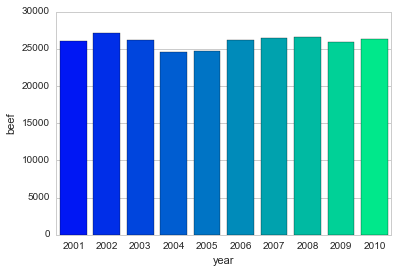

In [98]:


sns.barplot(x = meat_by_year.index, y = 'beef', data = meat_by_year, palette = 'winter')


In [101]:
#melt the dataset:

meat_melt = pd.melt(meat, id_vars=['date'])
meat_melt.head()

,date,variable,value
0,2001-01-01,beef,2205
1,2001-02-01,beef,1881
2,2001-03-01,beef,2096
3,2001-04-01,beef,1939
4,2001-05-01,beef,2294


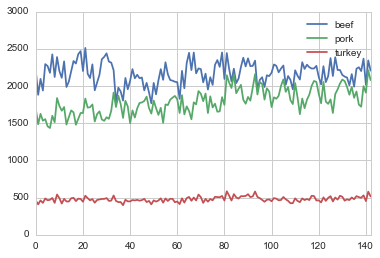

In [109]:
meat[['beef', 'pork', 'turkey']].plot()


In [110]:
#Overall, I think seaborn is slightly less intuitive than ggplot. I prefer R for manipulation and plotting tasks, with python for predictive analytics.